In [6]:
import sys
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
import urllib
from threading import Thread
from queue import Queue
import math
import requests
import time 
from datetime import timedelta
import pickle
from datetime import datetime

In [7]:
import matplotlib.pyplot as plt

In [8]:
import seaborn as sns
sns.set(color_codes=True)

In [ ]:
df = pd.DataFrame(columns=['author','date','activity', 'text', 'files'])
filne = "log_nodejs.txt"
##with urllib2.urlopen("https://file.io/rSWakX") as f:
with open(filne, 'r+', encoding="utf-8") as f:
    lines = f.readlines()
    ##for i in range(0, 100):
  
    for i in range(0, len(lines)):
        line = lines[i]
        if line[:6] == "commit":
            sha = line[8:].strip()
            ##Author
            line = lines[i+1]
            divided = line.split("<")
            divided[1][:-2]          
            author = divided[1][:-2]
            ##Author
            line = lines[i+2]
            divided = line.split(":   ")
            date = divided[1].strip()
            line = lines[i+3]  
            text = ""
            if line in ['\n', '\r\n']:
                line = lines[i + 4]
                divided = line.split(":")
                activity = divided[0].strip()
            j = 5
            text += line
            while 1:
                line = lines[i+j]            
                if line in ['\n', '\r\n']:
                    break
                text += line    
                j = j + 1
            j = j + 1
            files = []
            while 1:
                line = lines[i+j]            
                if line in ['\n', '\r\n']:
                    break
                files.append(line)   
                j = j + 1
            print("...........")
            ##print sha
            ##print author
            ##print date
            ##print activity
            ##print files
            print(text)
            df.loc[sha] = pd.Series({'author': author, 'date': date, 'activity': activity, 'text': text, 'files': files})
        


...........
    crypto: freelist_max_len is gone in OpenSSL 1.1.0
    
    The freelist_max_len member of SSL* (and the freelist itself) has been
    removed in OpenSSL 1.1.0. Thus this change will be necessary at some
    point but, for now, it makes it a little easier to build with 1.1.0
    without breaking anything for previous versions of OpenSSL.
    
    PR-URL: https://github.com/nodejs/node/pull/10859
    Reviewed-By: Sam Roberts <vieuxtech@gmail.com>
    Reviewed-By: Fedor Indutny <fedor.indutny@gmail.com>
    Reviewed-By: Ben Noordhuis <info@bnoordhuis.nl>
    Reviewed-By: James M Snell <jasnell@gmail.com>
    Reviewed-By: Shigeki Ohtsu <ohtsu@ohtsu.org>

...........
    url: refactor lib/internal/url.js
    
    * set an identifier for the separator rather than using multiple
      instances of the same literal
    * consistent arrow function body formatting
    
    PR-URL: https://github.com/nodejs/node/pull/10912
    Reviewed-By: Michaël Zasso <targos@protonmail.com>
   

In [10]:
df.head()

,author,date,activity,text,files
57e2f2138c37e636e1f7684ab07cb36eea79716,agl@google.com,Tue Jan 17 21:04:40 2017,crypto,crypto: freelist_max_len is gone in OpenSS...,"[ lib/_tls_common.js | 4 +++-\n, src/node_cry..."
b6123cfbe90141464bb86400a5f26c835c50f37,rtrott@gmail.com,Fri Jan 20 02:18:13 2017,url,url: refactor lib/internal/url.js\n \n ...,"[ lib/internal/url.js | 10 ++++++----\n, 1 fi..."
0c72c6d55452ffd0e7719b869bc54c3861595ab,rtrott@gmail.com,Thu Jan 19 20:19:07 2017,test,test: fix flaky test-regress-GH-897\n \...,[ test/parallel/test-regress-GH-897.js | 20 ...
67be658f966dafe3d16bdd7b5bbb7c5e58c7250,gib@uk.ibm.com,Tue Jan 17 11:30:43 2017,test,test: don't connect to :: (use localhost i...,[ test/gc/test-net-timeout.js ...
cab88d529da07a73174ffb5e93cd3652a4fe0dd,birunthan@mohanathas.com,Thu Jan 19 07:38:50 2017,url,url: add return value to ToUnicode/ToAscii...,[ src/node_url.cc | 58 +++++++++++++++++++++++...


In [11]:
len(df)

4716

In [12]:
df['changes'] = pd.Series(df['files'].str[-1], index=df.index)

In [13]:
df['n_files'] = pd.Series(df['changes'].str.split().str[0] , index=df.index)
df['insertions'] = pd.Series(df['changes'].str.split(",").str[1].str.split().str[0] , index=df.index)
df['deletions'] = pd.Series(df['changes'].str.split(",").str[2].str.split().str[0] , index=df.index)


In [14]:
del df['changes']
df.head()

,author,date,activity,text,files,n_files,insertions,deletions
57e2f2138c37e636e1f7684ab07cb36eea79716,agl@google.com,Tue Jan 17 21:04:40 2017,crypto,crypto: freelist_max_len is gone in OpenSS...,"[ lib/_tls_common.js | 4 +++-\n, src/node_cry...",2,7,1
b6123cfbe90141464bb86400a5f26c835c50f37,rtrott@gmail.com,Fri Jan 20 02:18:13 2017,url,url: refactor lib/internal/url.js\n \n ...,"[ lib/internal/url.js | 10 ++++++----\n, 1 fi...",1,6,4
0c72c6d55452ffd0e7719b869bc54c3861595ab,rtrott@gmail.com,Thu Jan 19 20:19:07 2017,test,test: fix flaky test-regress-GH-897\n \...,[ test/parallel/test-regress-GH-897.js | 20 ...,2,20,17
67be658f966dafe3d16bdd7b5bbb7c5e58c7250,gib@uk.ibm.com,Tue Jan 17 11:30:43 2017,test,test: don't connect to :: (use localhost i...,[ test/gc/test-net-timeout.js ...,2,2,4
cab88d529da07a73174ffb5e93cd3652a4fe0dd,birunthan@mohanathas.com,Thu Jan 19 07:38:50 2017,url,url: add return value to ToUnicode/ToAscii...,[ src/node_url.cc | 58 +++++++++++++++++++++++...,1,29,29


In [15]:
df['n_files'] = df.n_files.apply(pd.to_numeric, args=('coerce',))
df['insertions'] = df.insertions.apply(pd.to_numeric, args=('coerce',))
df['deletions'] = df.deletions.apply(pd.to_numeric, args=('coerce',))


In [16]:
df.head()

,author,date,activity,text,files,n_files,insertions,deletions
57e2f2138c37e636e1f7684ab07cb36eea79716,agl@google.com,Tue Jan 17 21:04:40 2017,crypto,crypto: freelist_max_len is gone in OpenSS...,"[ lib/_tls_common.js | 4 +++-\n, src/node_cry...",2,7,1.0
b6123cfbe90141464bb86400a5f26c835c50f37,rtrott@gmail.com,Fri Jan 20 02:18:13 2017,url,url: refactor lib/internal/url.js\n \n ...,"[ lib/internal/url.js | 10 ++++++----\n, 1 fi...",1,6,4.0
0c72c6d55452ffd0e7719b869bc54c3861595ab,rtrott@gmail.com,Thu Jan 19 20:19:07 2017,test,test: fix flaky test-regress-GH-897\n \...,[ test/parallel/test-regress-GH-897.js | 20 ...,2,20,17.0
67be658f966dafe3d16bdd7b5bbb7c5e58c7250,gib@uk.ibm.com,Tue Jan 17 11:30:43 2017,test,test: don't connect to :: (use localhost i...,[ test/gc/test-net-timeout.js ...,2,2,4.0
cab88d529da07a73174ffb5e93cd3652a4fe0dd,birunthan@mohanathas.com,Thu Jan 19 07:38:50 2017,url,url: add return value to ToUnicode/ToAscii...,[ src/node_url.cc | 58 +++++++++++++++++++++++...,1,29,29.0


In [17]:
pattern_code = ".*\.awk(~?)|.*\.scm(~?)|.*\.glsl(~?)|.*\.patch(~?)|.*\.c((\.swp)?)(~?)|.*/script(s?)/.*|.*\.jar(~?)|.*/src/.*|.*\.m((\.swp)?)(~?)|.*\.cs(~?)|.*\.idl(~?)|.*\.s(~?)|.*\.r((\.swp)?)(~?)|.*\.cxx(~?)|.*\.pyc(~?)|.*\.asm(x?)(~?)|.*\.py((\.swp)?)(~?)|.*\.y((\.swp)?)(~?)|.*\.gi((\.swp)?)(∼?)|.*\.t((\.swp)?)(~?)|.*\.dll(~?)|.*\.h˙template((\.swp)?)(∼?)|.*\.js((\.swp)?)(~?)|.*\.rb((\.swp)?)(~?)|.*\.c˙template((\.swp)?)(∼ ?)|.*\.hg((\.swp)?)(~?)|.*\.pm((\.swp)?)(~?)|.*\.php((\.swp)?)(\d?)(∼ ?)|.*\.cc((\.swp)?)(~?)|.*\.sh((\.swp)?)(~?)|.*\.php((\.swp)?)(\d?)(∼ ?)|.*\.el((\.swp)?)(~?)|.*\.hh((\.swp)?)(~?)|.*\.h((pp)?)((\.swp)?)(∼ ?)|.*\.xs((\.swp)?)(~?)|.*\.pl((\.swp)?)(~?)|.*\.h\.tmpl((\.swp)?)(∼?)|.*\.mm((\.swp)?)(~?)|.*\.idl((\.swp)?)(~?)|.*\.h.win32((\.swp)?)(∼ ?)|.*\.xpt((\.swp)?)(~?)|.*\.ccg((\.swp)?)(~?)|.*\.c˙tmpl((\.swp)?)(∼?)|.*\.snk((\.swp)?)(~?)|.*\.inc((\.swp)?)(~?)|.*\.asp(x?)((\.swp)?)(∼ ?)|.*\.cpp((\.swp)?)(~?)|.*\.gob((\.swp)?)(~?)|.*\.vapi((\.swp)?)(∼?)|.*\.giv((\.swp)?)(~?)|.*\.dtd((\.swp)?)(~?)|.*\.gidl((\.swp)?)(∼?)|.*\.giv((\.swp)?)(~?)|.*\.ada((\.swp)?)(~?)|.*\.defs((\.swp)?)(∼?)|.*\.tcl((\.swp)?)(~?)|.*\.vbs((\.swp)?)(~?)|.*\.java((\.swp)?)(∼?)|.*\.nib((\.swp)?)(~?)|.*\.sed((\.swp)?)(~?)|.*\.vala((˙swp)?)(∼?)"
pattern_doc = "|.*\.zabw|.*/potfiles|.*/install|.*\.wml|.*\.chm|.*\.ods|.*/copyright|.*/version|.*\.css|.*\.vcard(~?)|.*/plan|.*/feature(s?)|.*\.txt((\.bak)?)|.*/credits|.*/notes|.*/licence|.*\.txt((\.old)?)|.*\.man|.*/howto|.*/license|.*\.rtf|.*\.ics|.*/faq|.*/maintainers|.*\.tex|.*/documenters|.*copying|.*/copying|.*\.sgml|.*\.gnumeric|.*/copying.*|.*/committers|.*\.eps|.*\.vcf|.*/doc(s?)/.*|.*/thanks|.*\.xsd|.*\.schemas|.*/help(s?)/.*|.*/authors|.*\.texi|.*\.doc|.*/bugs|.*\.docx"
pattern_test = ".*\.test(s?)/.*|.*/.*test\..*|.*/test.*\..*"
pattern_build = "|.*\.m4(~?)|.*makefile.*|.*\.prj|.*\.plo|.*\.mk|.*\.make|.*\.deps|.*\.wxiproj|.*\.am(~?)|.*\.mp4|.*\.builder|.*\.lo|.*\.target|.*\.iss|.*\.nsi|.*\.wxi|.*/configure((\..+)?)|.*\.wxs|.*/mkbundle\..+|.*\.in|.*/autogen\.((.+\.)?)sh|.*\.wpj|.*\.vc(x?)proj(i?)n((\.filters((in)?))?)|.*\.vcproj((\.filters((in)?))?)"

In [18]:
df['pat_code'] = 0
df['pat_doc'] = 0
df['pat_test'] = 0
df['pat_build'] = 0
df.head()

,author,date,activity,text,files,n_files,insertions,deletions,pat_code,pat_doc,pat_test,pat_build
57e2f2138c37e636e1f7684ab07cb36eea79716,agl@google.com,Tue Jan 17 21:04:40 2017,crypto,crypto: freelist_max_len is gone in OpenSS...,"[ lib/_tls_common.js | 4 +++-\n, src/node_cry...",2,7,1.0,0,0,0,0
b6123cfbe90141464bb86400a5f26c835c50f37,rtrott@gmail.com,Fri Jan 20 02:18:13 2017,url,url: refactor lib/internal/url.js\n \n ...,"[ lib/internal/url.js | 10 ++++++----\n, 1 fi...",1,6,4.0,0,0,0,0
0c72c6d55452ffd0e7719b869bc54c3861595ab,rtrott@gmail.com,Thu Jan 19 20:19:07 2017,test,test: fix flaky test-regress-GH-897\n \...,[ test/parallel/test-regress-GH-897.js | 20 ...,2,20,17.0,0,0,0,0
67be658f966dafe3d16bdd7b5bbb7c5e58c7250,gib@uk.ibm.com,Tue Jan 17 11:30:43 2017,test,test: don't connect to :: (use localhost i...,[ test/gc/test-net-timeout.js ...,2,2,4.0,0,0,0,0
cab88d529da07a73174ffb5e93cd3652a4fe0dd,birunthan@mohanathas.com,Thu Jan 19 07:38:50 2017,url,url: add return value to ToUnicode/ToAscii...,[ src/node_url.cc | 58 +++++++++++++++++++++++...,1,29,29.0,0,0,0,0


In [19]:
import re
for index, row in df.iterrows():
    code = 0
    doc = 0
    test = 0
    build = 0
    for j in range(0, len(row['files'])):
        match_code = re.match(pattern_code, row['files'][j], flags=0)
        if match_code:
            code += 1
        match_doc = re.match(pattern_doc, row['files'][j], flags=0)
        if match_doc:
            doc += 1
        match_test = re.match(pattern_test, row['files'][j], flags=0)
        if match_test:
            test += 1
        match_build = re.match(pattern_build, row['files'][j], flags=0)
        if match_build:
            build += 1
    
    df.set_value(index, 'pat_code', code) 
    df.set_value(index, 'pat_doc', doc) 
    df.set_value(index, 'pat_test', test) 
    df.set_value(index, 'pat_build', build) 
df.head()
    

,author,date,activity,text,files,n_files,insertions,deletions,pat_code,pat_doc,pat_test,pat_build
57e2f2138c37e636e1f7684ab07cb36eea79716,agl@google.com,Tue Jan 17 21:04:40 2017,crypto,crypto: freelist_max_len is gone in OpenSS...,"[ lib/_tls_common.js | 4 +++-\n, src/node_cry...",2,7,1.0,2,3,0,3
b6123cfbe90141464bb86400a5f26c835c50f37,rtrott@gmail.com,Fri Jan 20 02:18:13 2017,url,url: refactor lib/internal/url.js\n \n ...,"[ lib/internal/url.js | 10 ++++++----\n, 1 fi...",1,6,4.0,1,2,0,2
0c72c6d55452ffd0e7719b869bc54c3861595ab,rtrott@gmail.com,Thu Jan 19 20:19:07 2017,test,test: fix flaky test-regress-GH-897\n \...,[ test/parallel/test-regress-GH-897.js | 20 ...,2,20,17.0,2,3,2,3
67be658f966dafe3d16bdd7b5bbb7c5e58c7250,gib@uk.ibm.com,Tue Jan 17 11:30:43 2017,test,test: don't connect to :: (use localhost i...,[ test/gc/test-net-timeout.js ...,2,2,4.0,2,3,2,3
cab88d529da07a73174ffb5e93cd3652a4fe0dd,birunthan@mohanathas.com,Thu Jan 19 07:38:50 2017,url,url: add return value to ToUnicode/ToAscii...,[ src/node_url.cc | 58 +++++++++++++++++++++++...,1,29,29.0,1,2,0,2


In [20]:
df.insertions.describe()

count      4716.000000
mean        732.071459
std       10566.586003
min           0.000000
25%           3.000000
50%          11.000000
75%          39.000000
max      475138.000000
Name: insertions, dtype: float64

In [21]:
comment_code = "(?:^|\W)cod(?:$|)"
comment_doc = "(?:^|\W)doc(?:$|)"
comment_test = "(?:^|\W)test(?:$|)"
comment_build = "(?:^|\W)build(?:$|)"


In [22]:
df['text_code'] = 0
df['text_doc'] = 0
df['text_test'] = 0
df['text_build'] = 0

In [23]:
match_code = re.findall(comment_code, df['text'][1], re.IGNORECASE)
match_doc = re.findall(comment_doc, df['text'][1], re.IGNORECASE)
match_test = re.findall(comment_test, df['text'][1], re.IGNORECASE)
match_build = re.findall(comment_build, df['text'][1], re.IGNORECASE)


In [24]:
for index, row in df.iterrows():   
    match_code = re.findall(comment_code, row['text'], re.IGNORECASE)
    match_doc = re.findall(comment_doc, row['text'], re.IGNORECASE)
    match_test = re.findall(comment_test, row['text'], re.IGNORECASE)
    match_build = re.findall(comment_build, row['text'], re.IGNORECASE)

    df.set_value(index, 'text_code', len(match_code)) 
    df.set_value(index, 'text_doc', len(match_doc)) 
    df.set_value(index, 'text_test', len(match_test))
    df.set_value(index, 'text_build', len(match_build)) 
df.head()

,author,date,activity,text,files,n_files,insertions,deletions,pat_code,pat_doc,pat_test,pat_build,text_code,text_doc,text_test,text_build
57e2f2138c37e636e1f7684ab07cb36eea79716,agl@google.com,Tue Jan 17 21:04:40 2017,crypto,crypto: freelist_max_len is gone in OpenSS...,"[ lib/_tls_common.js | 4 +++-\n, src/node_cry...",2,7,1.0,2,3,0,3,0,0,0,1
b6123cfbe90141464bb86400a5f26c835c50f37,rtrott@gmail.com,Fri Jan 20 02:18:13 2017,url,url: refactor lib/internal/url.js\n \n ...,"[ lib/internal/url.js | 10 ++++++----\n, 1 fi...",1,6,4.0,1,2,0,2,0,0,0,0
0c72c6d55452ffd0e7719b869bc54c3861595ab,rtrott@gmail.com,Thu Jan 19 20:19:07 2017,test,test: fix flaky test-regress-GH-897\n \...,[ test/parallel/test-regress-GH-897.js | 20 ...,2,20,17.0,2,3,2,3,0,0,10,0
67be658f966dafe3d16bdd7b5bbb7c5e58c7250,gib@uk.ibm.com,Tue Jan 17 11:30:43 2017,test,test: don't connect to :: (use localhost i...,[ test/gc/test-net-timeout.js ...,2,2,4.0,2,3,2,3,0,0,2,0
cab88d529da07a73174ffb5e93cd3652a4fe0dd,birunthan@mohanathas.com,Thu Jan 19 07:38:50 2017,url,url: add return value to ToUnicode/ToAscii...,[ src/node_url.cc | 58 +++++++++++++++++++++++...,1,29,29.0,1,2,0,2,0,0,0,0


In [25]:
from textblob import TextBlob

In [26]:
df['subjectivity'] = 0
df['polarity'] = 0

In [27]:
for index, row in df.iterrows(): 
    textblob = TextBlob(row['text'])
    df.set_value(index, 'polarity', textblob.sentiment.polarity) 
    df.set_value(index, 'subjectivity', textblob.sentiment.subjectivity) 
df.head()

,author,date,activity,text,files,n_files,insertions,deletions,pat_code,pat_doc,pat_test,pat_build,text_code,text_doc,text_test,text_build,subjectivity,polarity
57e2f2138c37e636e1f7684ab07cb36eea79716,agl@google.com,Tue Jan 17 21:04:40 2017,crypto,crypto: freelist_max_len is gone in OpenSS...,"[ lib/_tls_common.js | 4 +++-\n, src/node_cry...",2,7,1.0,2,3,0,3,0,0,0,1,0,0
b6123cfbe90141464bb86400a5f26c835c50f37,rtrott@gmail.com,Fri Jan 20 02:18:13 2017,url,url: refactor lib/internal/url.js\n \n ...,"[ lib/internal/url.js | 10 ++++++----\n, 1 fi...",1,6,4.0,1,2,0,2,0,0,0,0,0,0
0c72c6d55452ffd0e7719b869bc54c3861595ab,rtrott@gmail.com,Thu Jan 19 20:19:07 2017,test,test: fix flaky test-regress-GH-897\n \...,[ test/parallel/test-regress-GH-897.js | 20 ...,2,20,17.0,2,3,2,3,0,0,10,0,0,0
67be658f966dafe3d16bdd7b5bbb7c5e58c7250,gib@uk.ibm.com,Tue Jan 17 11:30:43 2017,test,test: don't connect to :: (use localhost i...,[ test/gc/test-net-timeout.js ...,2,2,4.0,2,3,2,3,0,0,2,0,1,0
cab88d529da07a73174ffb5e93cd3652a4fe0dd,birunthan@mohanathas.com,Thu Jan 19 07:38:50 2017,url,url: add return value to ToUnicode/ToAscii...,[ src/node_url.cc | 58 +++++++++++++++++++++++...,1,29,29.0,1,2,0,2,0,0,0,0,0,0


In [28]:
df.polarity.describe()

count    4716.0
mean        0.0
std         0.0
min         0.0
25%         0.0
50%         0.0
75%         0.0
max         0.0
Name: polarity, dtype: float64

In [29]:
print('Class                                                                                        Amount')
for i in range(1,10):
    classCount = df.activity.value_counts()
print(classCount)

Class                                                                                        Amount
test                                               1131
doc                                                1118
src                                                 288
deps                                                237
tools                                               202
build                                               156
buffer                                              108
http                                                 80
benchmark                                            75
repl                                                 74
crypto                                               64
fs                                                   61
util                                                 50
lib                                                  45
tls                                                  43
net                                                  39
url 

In [30]:
print('User                                 Count')
for i in range(1,10):
    classCount = df.author.value_counts()
print(classCount)

User                                 Count
rtrott@gmail.com                       609
info@bnoordhuis.nl                     292
rod@vagg.org                           178
jasnell@gmail.com                      178
cjihrig@gmail.com                      144
mscdex@mscdex.net                      142
anna@addaleax.net                      133
thechargingvolcano@gmail.com           117
fedor@indutny.com                      111
fishrock123@rocketmail.com              97
evanlucas@me.com                        91
trev.norris@gmail.com                   82
ofrobots@google.com                     73
santiago.gimeno@gmail.com               66
mborins@us.ibm.com                      60
mic.besace@gmail.com                    57
ohtsu@iij.ad.jp                         52
me@silverwind.io                        48
targos@protonmail.com                   46
edsadr@gmail.com                        44
vieuxtech@gmail.com                     42
michael_dawson@ca.ibm.com               39
eostroukhov

In [31]:
x = {'Count': pd.Series(df.activity.value_counts())
     }
activity_count = pd.DataFrame(x)
activity_count.head()






                    
                    


,Count
test,1131
doc,1118
src,288
deps,237
tools,202


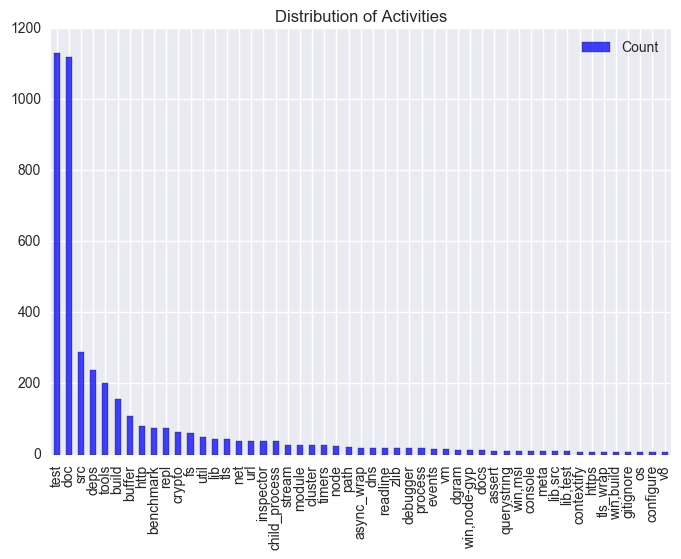

In [32]:
plt.figure(figsize=(18,10))
activity_count.query('Count > 5').plot(kind='bar', color="blue", alpha=.75)
plt.title("Distribution of Activities")
plt.show()

In [33]:
#####################

In [34]:
#####################

In [35]:
############################

In [36]:
dfTest = df[df.activity.isin(["test","doc", "src", "deps", "tools", "build"])] 

In [37]:
dfTest.describe()

D:\Anaconda\lib\site-packages\numpy\lib\function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,n_files,insertions,deletions,pat_code,pat_doc,pat_test,pat_build,text_code,text_doc,text_test,text_build,subjectivity,polarity
count,3132.000000,3132.000000,2455.000000,3132.000000,3132.000000,3132.000000,3132.000000,3132.000000,3132.000000,3132.000000,3132.000000,3132.000000,3132.0
mean,20.023946,1062.386335,711.414664,16.480204,21.023946,5.253831,21.023946,0.113027,0.537676,1.030013,0.125160,0.015964,0.0
std,160.807980,12950.019875,6771.314127,146.004053,160.807980,47.914505,160.807980,0.392353,0.968451,1.627885,0.549945,0.125357,0.0
min,1.000000,0.000000,0.000000,0.000000,2.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,1.000000,2.000000,NaN,1.000000,2.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
50%,1.000000,8.000000,NaN,1.000000,2.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
75%,2.000000,28.000000,NaN,1.000000,3.000000,1.000000,3.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.0
max,4293.000000,475138.000000,160046.000000,4090.000000,4294.000000,971.000000,4294.000000,4.000000,25.000000,19.000000,10.000000,1.000000,0.0


In [38]:
dfTest['deletions'] = dfTest['deletions'].fillna('0')


D:\Anaconda\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [ ]:
##LEAVE THINGS ABOVE, BUT NOT RUN THEM

In [ ]:
#######

In [ ]:
#######

In [ ]:
#######

In [ ]:
#######

In [ ]:
#######

In [111]:
dfTest.to_csv('nodejs_Training.csv', encoding="utf-8")

In [39]:
from sklearn import cross_validation
from sklearn.preprocessing import *
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import *
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import *
from sklearn.cross_validation import KFold
import random

In [40]:
dfFinal = dfTest.drop("activity", 1).drop("files", 1).drop("text", 1).drop("date", 1).drop("author", 1)
X = dfFinal.values
y = dfTest.activity.values

In [41]:
dfTest.head()

,author,date,activity,text,files,n_files,insertions,deletions,pat_code,pat_doc,pat_test,pat_build,text_code,text_doc,text_test,text_build,subjectivity,polarity
0c72c6d55452ffd0e7719b869bc54c3861595ab,rtrott@gmail.com,Thu Jan 19 20:19:07 2017,test,test: fix flaky test-regress-GH-897\n \...,[ test/parallel/test-regress-GH-897.js | 20 ...,2,20,17,2,3,2,3,0,0,10,0,0,0
67be658f966dafe3d16bdd7b5bbb7c5e58c7250,gib@uk.ibm.com,Tue Jan 17 11:30:43 2017,test,test: don't connect to :: (use localhost i...,[ test/gc/test-net-timeout.js ...,2,2,4,2,3,2,3,0,0,2,0,1,0
9ebdf14005cc948529b3f193ad550d5dfded26a,timothygu99@gmail.com,Sun Jan 22 22:28:57 2017,doc,doc: add TimothyGu to collaborators\n \...,"[ README.md | 2 ++\n, 1 file changed, 2 inser...",1,2,0,1,2,0,2,0,1,0,0,0,0
024104eecebda372022b671df97439e41f024ec,vinicius.m.do.carmo@gmail.com,Fri Jan 20 03:01:01 2017,test,test: improve test-fs-open-flags\n \n ...,[ test/parallel/test-fs-open-flags.js | 15 +++...,1,11,4,1,2,1,2,0,0,2,0,0,0
f75e21662fa5442e9069bfb6f23b625ea1a5b6f,git@about-hiroppy.com,Thu Jan 19 07:36:32 2017,test,test: add dgram.Socket.prototype.bind's te...,[ test/parallel/test-dgram-bind.js | 10 ++++++...,1,7,3,1,2,1,2,0,0,3,0,0,0


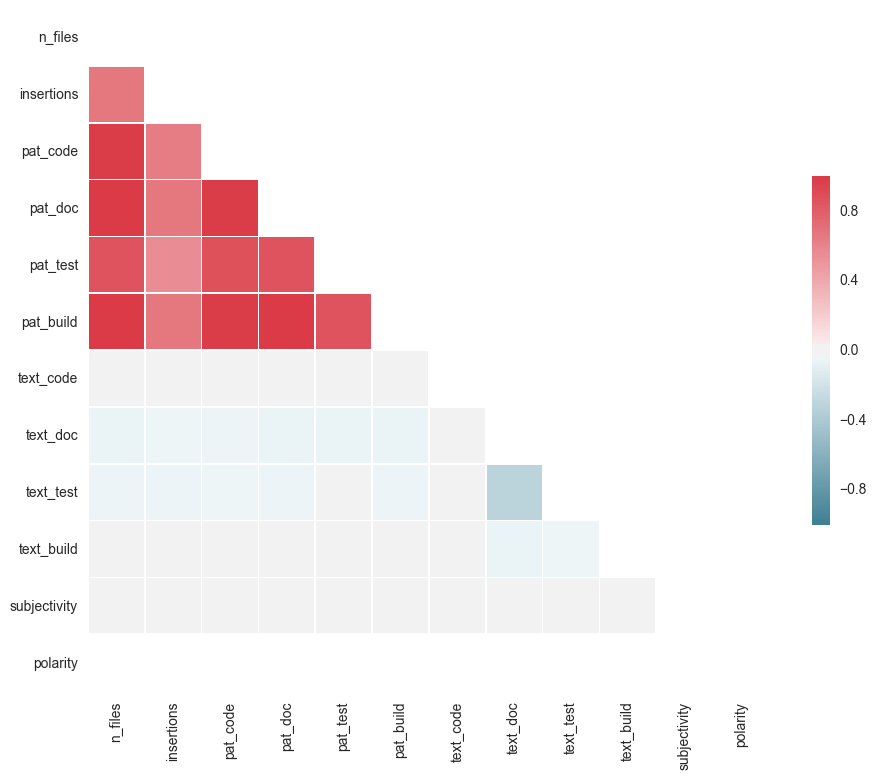

In [75]:
sns.set(style="white")
corr = dfFinal.corr()
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1,
            square=True,
            linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)
sns.plt.show()

In [59]:
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y)
y_train

array(['src', 'test', 'test', ..., 'test', 'doc', 'test'], dtype=object)

In [44]:
def accuracy_dist(clfs, X, y, n=10):
    accuracy = np.zeros((n,len(clfs)))
    columns = [clf.__class__.__name__ for clf in clfs]
    for i in range(n):
        X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, random_state=31*i)
        for j in range(len(clfs)):
            clf = clfs[j]
            clf.fit(X_train,y_train)
            accuracy[i][j] = clf.score(X_test,y_test)
    return pd.DataFrame(accuracy, columns=columns, index=range(n))

D:\Anaconda\lib\site-packages\sklearn\discriminant_analysis.py:453: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)
D:\Anaconda\lib\site-packages\sklearn\discriminant_analysis.py:387: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
D:\Anaconda\lib\site-packages\sklearn\utils\validation.py:420: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
D:\Anaconda\lib\site-packages\sklearn\utils\validation.py:420: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


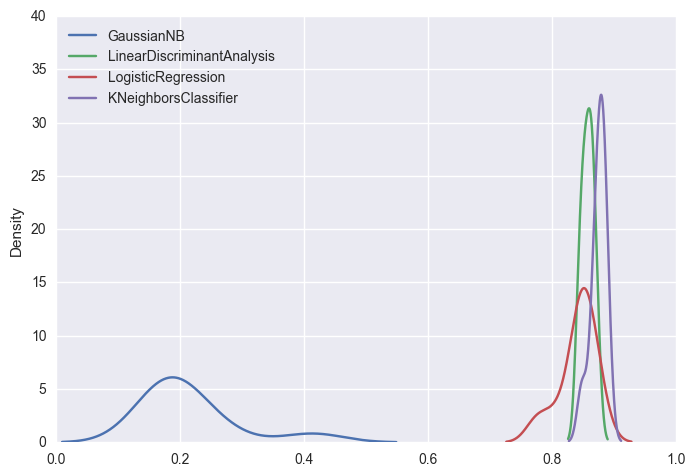

In [47]:
accuracy_df = accuracy_dist([GaussianNB(),LinearDiscriminantAnalysis(),LogisticRegression()], X, y)
accuracy_df = pd.concat(
    (accuracy_df, accuracy_dist([KNeighborsClassifier()], StandardScaler().fit_transform(X), y)), axis=1)
accuracy_df.plot(kind='kde', ylim=[0,40])
plt.show()

In [62]:
clf = LinearDiscriminantAnalysis()
clf.fit(X_train, y_train)
accuracy = clf.score(X_test, y_test)
"accuracy: %.1f percent"%(100*accuracy)

D:\Anaconda\lib\site-packages\sklearn\discriminant_analysis.py:387: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


'accuracy: 86.7 percent'

In [63]:
df.describe()

D:\Anaconda\lib\site-packages\numpy\lib\function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,n_files,insertions,deletions,pat_code,pat_doc,pat_test,pat_build,text_code,text_doc,text_test,text_build,subjectivity,polarity
count,4716.000000,4716.000000,3772.000000,4716.000000,4716.000000,4716.000000,4716.000000,4716.000000,4716.000000,4716.000000,4716.000000,4716.000000,4716.0
mean,14.384436,732.071459,478.211029,11.925148,15.384436,3.811069,15.384436,0.114080,0.391009,0.758058,0.103265,0.015691,0.0
std,131.389011,10566.586003,5478.142932,119.250411,131.389011,39.213797,131.389011,0.406893,0.846549,1.443231,0.494875,0.124291,0.0
min,1.000000,0.000000,0.000000,0.000000,2.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,1.000000,3.000000,NaN,1.000000,2.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
50%,1.000000,11.000000,NaN,1.000000,2.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
75%,2.000000,39.000000,NaN,2.000000,3.000000,1.000000,3.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.0
max,4293.000000,475138.000000,160046.000000,4090.000000,4294.000000,971.000000,4294.000000,6.000000,25.000000,19.000000,10.000000,1.000000,0.0


In [64]:
dfComplete = df.copy()
dfComplete['deletions'] = dfComplete['deletions'].fillna(0)
dfComplete['n_files'] = dfComplete['n_files'].fillna(0)
dfComplete['insertions'] = dfComplete['insertions'].fillna(0)
dfComplete.describe()

,n_files,insertions,deletions,pat_code,pat_doc,pat_test,pat_build,text_code,text_doc,text_test,text_build,subjectivity,polarity
count,4716.000000,4716.000000,4716.000000,4716.000000,4716.000000,4716.000000,4716.000000,4716.000000,4716.000000,4716.000000,4716.000000,4716.000000,4716.0
mean,14.384436,732.071459,382.487701,11.925148,15.384436,3.811069,15.384436,0.114080,0.391009,0.758058,0.103265,0.015691,0.0
std,131.389011,10566.586003,4902.886491,119.250411,131.389011,39.213797,131.389011,0.406893,0.846549,1.443231,0.494875,0.124291,0.0
min,1.000000,0.000000,0.000000,0.000000,2.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,1.000000,3.000000,1.000000,1.000000,2.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
50%,1.000000,11.000000,3.000000,1.000000,2.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
75%,2.000000,39.000000,13.000000,2.000000,3.000000,1.000000,3.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.0
max,4293.000000,475138.000000,160046.000000,4090.000000,4294.000000,971.000000,4294.000000,6.000000,25.000000,19.000000,10.000000,1.000000,0.0


In [65]:
dfCompleteX = dfComplete.drop("activity", 1).drop("files", 1).drop("text", 1).drop("date", 1).drop("author", 1)

In [66]:
dfCompleteX.head()

,n_files,insertions,deletions,pat_code,pat_doc,pat_test,pat_build,text_code,text_doc,text_test,text_build,subjectivity,polarity
57e2f2138c37e636e1f7684ab07cb36eea79716,2,7,1.0,2,3,0,3,0,0,0,1,0,0
b6123cfbe90141464bb86400a5f26c835c50f37,1,6,4.0,1,2,0,2,0,0,0,0,0,0
0c72c6d55452ffd0e7719b869bc54c3861595ab,2,20,17.0,2,3,2,3,0,0,10,0,0,0
67be658f966dafe3d16bdd7b5bbb7c5e58c7250,2,2,4.0,2,3,2,3,0,0,2,0,1,0
cab88d529da07a73174ffb5e93cd3652a4fe0dd,1,29,29.0,1,2,0,2,0,0,0,0,0,0


In [67]:
dfComplete["predicted"] = clf.predict(dfCompleteX)

In [68]:
dfComplete.describe()

,n_files,insertions,deletions,pat_code,pat_doc,pat_test,pat_build,text_code,text_doc,text_test,text_build,subjectivity,polarity
count,4716.000000,4716.000000,4716.000000,4716.000000,4716.000000,4716.000000,4716.000000,4716.000000,4716.000000,4716.000000,4716.000000,4716.000000,4716.0
mean,14.384436,732.071459,382.487701,11.925148,15.384436,3.811069,15.384436,0.114080,0.391009,0.758058,0.103265,0.015691,0.0
std,131.389011,10566.586003,4902.886491,119.250411,131.389011,39.213797,131.389011,0.406893,0.846549,1.443231,0.494875,0.124291,0.0
min,1.000000,0.000000,0.000000,0.000000,2.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,1.000000,3.000000,1.000000,1.000000,2.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
50%,1.000000,11.000000,3.000000,1.000000,2.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
75%,2.000000,39.000000,13.000000,2.000000,3.000000,1.000000,3.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.0
max,4293.000000,475138.000000,160046.000000,4090.000000,4294.000000,971.000000,4294.000000,6.000000,25.000000,19.000000,10.000000,1.000000,0.0


In [69]:
x = {'Count': pd.Series(dfComplete.predicted.value_counts())
     }
activity_count = pd.DataFrame(x)
activity_count.head()

,Count
src,1713
test,1355
doc,1245
build,230
deps,116


In [70]:
dfComplete[["activity", "predicted"]]

,activity,predicted
57e2f2138c37e636e1f7684ab07cb36eea79716,crypto,build
b6123cfbe90141464bb86400a5f26c835c50f37,url,src
0c72c6d55452ffd0e7719b869bc54c3861595ab,test,test
67be658f966dafe3d16bdd7b5bbb7c5e58c7250,test,test
cab88d529da07a73174ffb5e93cd3652a4fe0dd,url,src
9ebdf14005cc948529b3f193ad550d5dfded26a,doc,doc
024104eecebda372022b671df97439e41f024ec,test,test
f75e21662fa5442e9069bfb6f23b625ea1a5b6f,test,test
2ccffb081204c8f9b8b5a2a57354276f5676891,test,test
26e967c6bddd1cfb901f7b12d06f9e3136243c1,url,src


In [ ]:
#### TAKING THE OTHER PREDICTOR #####

In [ ]:
#################################

In [72]:
dfTest2 = pd.read_csv('jQuery_Training.csv', index_col=0, encoding="utf-8")
dfFinal2 = dfTest2.drop("activity", 1).drop("files", 1).drop("text", 1).drop("date", 1).drop("author", 1)
X = dfFinal2.values
y = dfTest2.activity.values
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y)
clf2 = LinearDiscriminantAnalysis()
clf2.fit(X_train, y_train)

D:\Anaconda\lib\site-packages\sklearn\discriminant_analysis.py:387: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
              solver='svd', store_covariance=False, tol=0.0001)

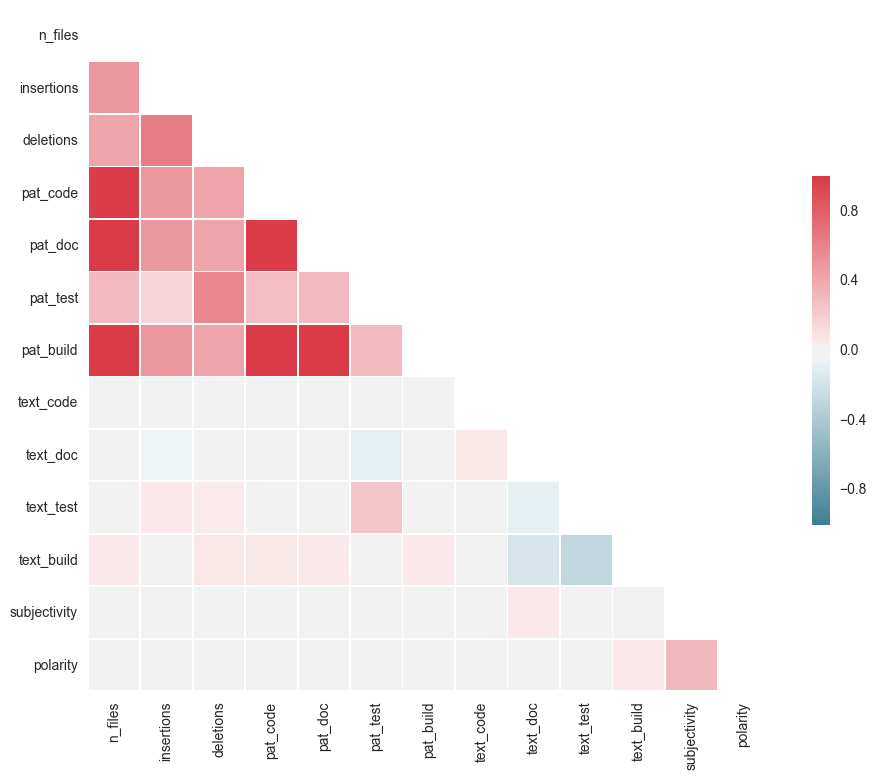

In [113]:
sns.set(style="white")
corr = dfFinal2.corr()
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1,
            square=True,
            linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)
sns.plt.show()

In [112]:
dfComplete["predicted2"] = clf2.predict(dfCompleteX)
dfComplete[["activity", "predicted", "predicted2"]]

,activity,predicted,predicted2
57e2f2138c37e636e1f7684ab07cb36eea79716,crypto,build,Build
b6123cfbe90141464bb86400a5f26c835c50f37,url,src,Core
0c72c6d55452ffd0e7719b869bc54c3861595ab,test,test,Tests
67be658f966dafe3d16bdd7b5bbb7c5e58c7250,test,test,Tests
cab88d529da07a73174ffb5e93cd3652a4fe0dd,url,src,Core
9ebdf14005cc948529b3f193ad550d5dfded26a,doc,doc,Docs
024104eecebda372022b671df97439e41f024ec,test,test,Tests
f75e21662fa5442e9069bfb6f23b625ea1a5b6f,test,test,Tests
2ccffb081204c8f9b8b5a2a57354276f5676891,test,test,Tests
26e967c6bddd1cfb901f7b12d06f9e3136243c1,url,src,Tests


,activity,predicted,predicted2
57e2f2138c37e636e1f7684ab07cb36eea79716,crypto,build,Build
b6123cfbe90141464bb86400a5f26c835c50f37,url,src,Core
0c72c6d55452ffd0e7719b869bc54c3861595ab,test,test,Tests
67be658f966dafe3d16bdd7b5bbb7c5e58c7250,test,test,Tests
cab88d529da07a73174ffb5e93cd3652a4fe0dd,url,src,Core
9ebdf14005cc948529b3f193ad550d5dfded26a,doc,doc,Docs
024104eecebda372022b671df97439e41f024ec,test,test,Tests
f75e21662fa5442e9069bfb6f23b625ea1a5b6f,test,test,Tests
2ccffb081204c8f9b8b5a2a57354276f5676891,test,test,Tests
26e967c6bddd1cfb901f7b12d06f9e3136243c1,url,src,Tests


In [109]:
def accuracy_dist(name, x, y, dfComplete):
    print("----")
    print(name)
    correct = len(dfComplete[dfComplete.predicted.isin([x])][dfComplete.predicted2.isin([y])])
    wrong = len(dfComplete[dfComplete.predicted.isin([x])][~dfComplete.predicted2.isin([y])]) + len(dfComplete[~dfComplete.predicted.isin([x])][dfComplete.predicted2.isin([y])])
    print(correct/(correct + wrong))
    print("Same")
    print(correct)
    print("Different")
    print(wrong)
    print("----")

In [110]:
accuracy_dist("CORE", "src", "Core", dfComplete)
accuracy_dist("BUILD", "build", "Build", dfComplete)
accuracy_dist("DOCS", "doc", "Docs", dfComplete)
accuracy_dist("TEST", "test", "Tests", dfComplete)


----
CORE
0.9289311695579183
Same
1660
Different
127
----
----
BUILD
0.742671009771987
Same
228
Different
79
----
----
DOCS
0.9623233908948194
Same
1226
Different
48
----
----
TEST
0.8902522154055896
Same
1306
Different
161
----


D:\Anaconda\lib\site-packages\ipykernel\__main__.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
D:\Anaconda\lib\site-packages\ipykernel\__main__.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


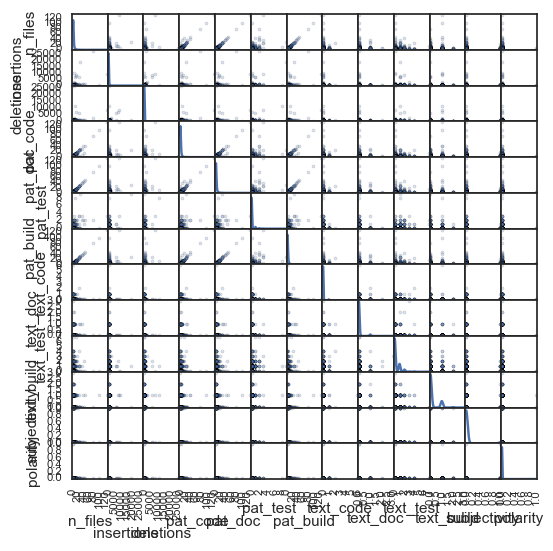

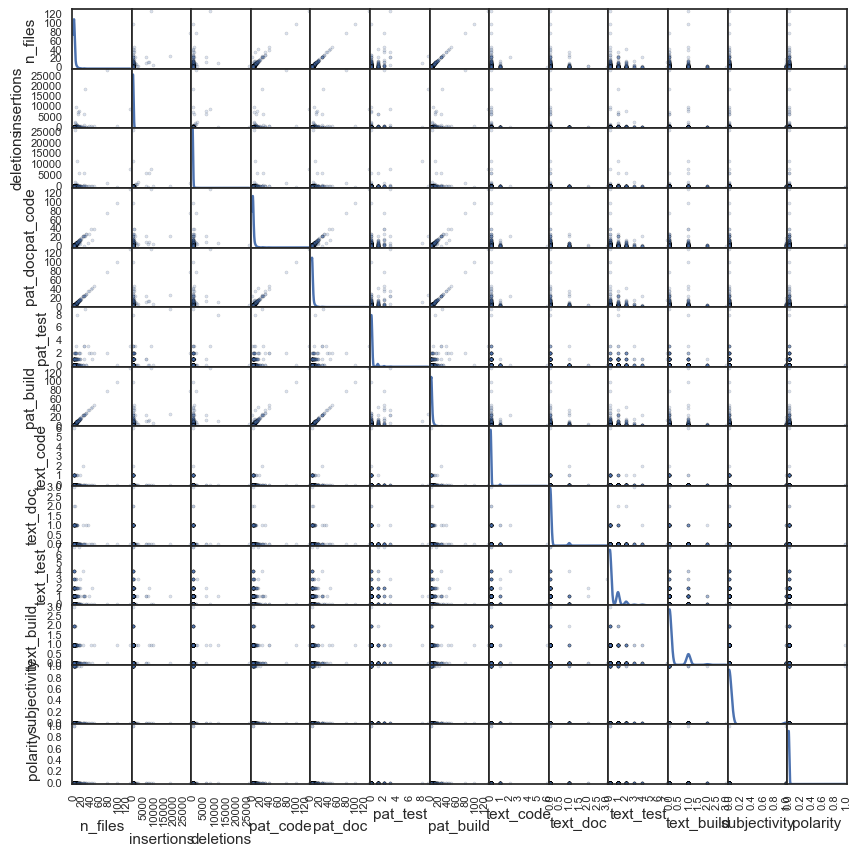

In [185]:
from pandas.tools.plotting import scatter_matrix

scatter_matrix(dfComplete, alpha=0.2, figsize=(10, 10), diagonal='kde')
plt.show()

In [130]:
clf = GaussianNB()
clf.fit(X_train, y_train)
accuracy = clf.score(X_test, y_test)
"accuracy: %.1f percent"%(100*accuracy)

'accuracy: 61.1 percent'

In [131]:
clf = KNeighborsClassifier()
clf.fit(X_train, y_train)
accuracy = clf.score(X_test, y_test)
"accuracy: %.1f percent"%(100*accuracy)

'accuracy: 54.7 percent'

In [132]:
scaler = StandardScaler().fit(X_train)
X_train_sc = scaler.transform(X_train)
X_test_sc = scaler.transform(X_test)

C:\Program Files\Anaconda3\lib\site-packages\sklearn\utils\validation.py:420: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Program Files\Anaconda3\lib\site-packages\sklearn\utils\validation.py:420: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Program Files\Anaconda3\lib\site-packages\sklearn\utils\validation.py:420: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [140]:
clf = KNeighborsClassifier()
clf.fit(X_train_sc, y_train)
accuracy = clf.score(X_test_sc, y_test)
"accuracy: %.1f percent"%(100*accuracy)

'accuracy: 87.4 percent'

In [139]:
clf = LogisticRegression()
clf.fit(X_train, y_train)
accuracy = clf.score(X_test, y_test)
"accuracy: %.1f percent"%(100*accuracy)

'accuracy: 85.3 percent'

In [138]:
def accuracy_dist(clfs, X, y, n=10):
    accuracy = np.zeros((n,len(clfs)))
    columns = [clf.__class__.__name__ for clf in clfs]
    for i in range(n):
        X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, random_state=31*i)
        for j in range(len(clfs)):
            clf = clfs[j]
            clf.fit(X_train,y_train)
            accuracy[i][j] = clf.score(X_test,y_test)
    return pd.DataFrame(accuracy, columns=columns, index=range(n))

C:\Program Files\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:387: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Program Files\Anaconda3\lib\site-packages\sklearn\utils\validation.py:420: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Program Files\Anaconda3\lib\site-packages\sklearn\utils\validation.py:420: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


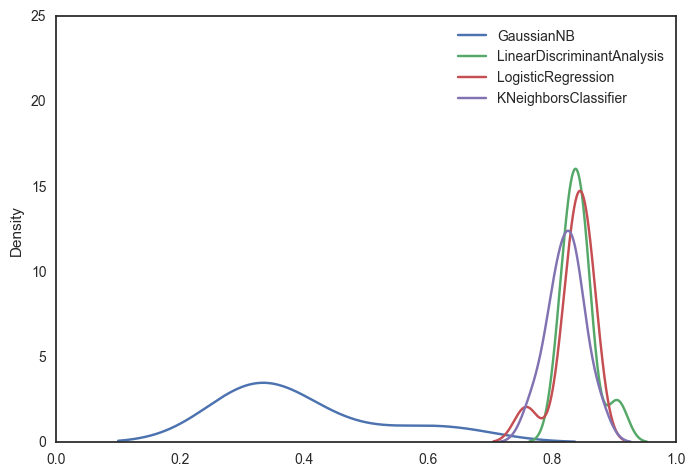

In [135]:
accuracy_df = accuracy_dist([GaussianNB(),LinearDiscriminantAnalysis(),LogisticRegression()], X, y)
accuracy_df = pd.concat(
    (accuracy_df, accuracy_dist([KNeighborsClassifier()], StandardScaler().fit_transform(X), y)), axis=1)
accuracy_df.plot(kind='kde', ylim=[0,25])
plt.show()

In [51]:
y = {'Count': pd.Series(df.author.value_counts())
     }
author_count = pd.DataFrame(y)
author_count.head()



,Count
timmywillisn@gmail.com,245
m.goleb@gmail.com,221
markelog@gmail.com,179
richard.gibson@gmail.com,145
dave.methvin@gmail.com,135


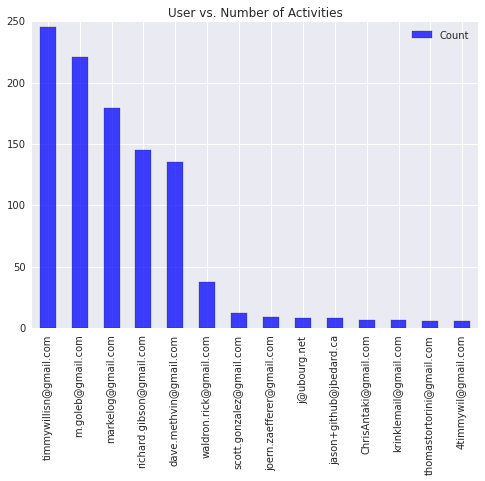

In [49]:
plt.figure(figsize=(18,10))
author_count.query('Count > 5').plot(kind='bar', color="blue", alpha=.75)
plt.title("User vs. Number of Activities")
plt.show()

In [ ]:
for index, row in df.iterrows(): 
    textblob = TextBlob(row['text'])
    df.set_value(index, 'polarity', textblob.sentiment.polarity) 
    df.set_value(index, 'subjectivity', textblob.sentiment.subjectivity) 
df.head()